#Ensemble Learning

Q1

-->Yes, Bagging (Bootstrap Aggregating) can absolutely be used for regression problems, not just classification.

How Bagging Works in Regression:
Bagging involves training multiple models (typically decision trees) on different bootstrapped subsets of the training data and then aggregating their predictions.

For regression, the aggregation is usually done by averaging the predictions of the individual models.

This reduces variance and helps to avoid overfitting, especially with high-variance models like decision trees.

Common Example:
Bagging Regressor using Decision Trees is a popular choice.

In scikit-learn, it's implemented as:

python
Copy
Edit
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

model = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
Benefits of Using Bagging for Regression:
Reduces overfitting by combining multiple models.

Improves generalization performance.

Works well with unstable models (models that change significantly with small changes in training data).

Q2

-->The difference between multiple model training and single model training lies in how many machine learning models are being trained, how they're used, and the purpose they serve. Here’s a clear comparison:

✅ Single Model Training
Definition: Training one model on the entire dataset.

Use case: When the data distribution is consistent, and a single model is sufficient to capture the underlying patterns.

Advantages:

Simpler to implement and manage.

Requires less computational resources.

Easier to debug and interpret.

Disadvantages:

May not perform well if data is highly diverse or contains multiple subgroups.

Struggles with tasks requiring specialization (e.g., different customer segments, domains, or tasks).

Example: Training one sentiment analysis model for all product reviews regardless of product category.

✅ Multiple Model Training
Definition: Training multiple models, either:

On different subsets of data (e.g., per user, region, or task), or

For different tasks (e.g., multitask learning), or

As part of an ensemble (e.g., random forest, boosting).

Use cases:

Complex problems where different models are needed for different data segments.

Scenarios requiring high accuracy, specialization, or robustness.

When combining models increases predictive power (ensemble learning).

Advantages:

Greater flexibility and adaptability.

Can handle heterogeneous data better.

Often improves accuracy and robustness.

Disadvantages:

Increased computational cost.

More complex to implement, tune, and maintain.

Harder to interpret and debug.

Examples:

Training a separate fraud detection model per country due to regulatory differences.

Ensemble of models (e.g., stacking, bagging) to improve generalization.

Q3

-->In the context of Random Forests, feature randomness refers to the deliberate introduction of randomness in the selection of features used to split nodes during the construction of individual decision trees within the forest. This is a key technique used to increase model diversity and reduce overfitting.

Here's how feature randomness works:
In a standard decision tree, when a node is split, the algorithm looks through all features and selects the one that provides the best split (e.g., based on Gini impurity or information gain).

In a Random Forest, at each split in the decision tree:

A random subset of features is selected (instead of using all features).

The best split is then chosen only among this subset.

Example:
Suppose your dataset has 100 features.

In a traditional decision tree, each split could consider all 100 features.

In a Random Forest, each split might only consider, say, √100 = 10 randomly selected features (this is the default for classification tasks in many implementations).

This random selection is repeated independently at each node and for each tree.

Why introduce feature randomness?
Reduces correlation between trees:

If trees are too similar (e.g., all choosing the same dominant features), the ensemble won’t gain much from averaging.

Random feature selection forces trees to learn different patterns.

Improves generalization:

Because the trees are less correlated, averaging their predictions tends to reduce variance without a corresponding increase in bias.

Prevents overfitting:

Especially helpful in high-dimensional datasets, where some features may dominate the splits if not controlled.



Q4

-->The Out-of-Bag (OOB) score is a method for evaluating the performance of ensemble models, particularly Random Forests, without the need for a separate validation dataset or cross-validation.

🔍 What It Means:
When a Random Forest builds each tree, it does so using a bootstrap sample — a random sample taken with replacement from the training data. On average, about 63% of the training data is used in each bootstrap sample, meaning about 37% is left out for that particular tree. These unused samples are called the Out-of-Bag (OOB) samples.

🧠 How OOB Score Works:
Each tree is trained on a bootstrap sample.

The model is then tested on the OOB samples (the data not used to train that particular tree).

This is repeated across all trees in the forest.

For each training data point, predictions are made using only the trees for which that point was OOB.

The overall OOB score is the accuracy (or another metric, like mean squared error) of these predictions compared to the true labels.

Q5

-->Measuring feature importance in a Random Forest model is a key step in interpreting the model. There are a few widely used methods, each with its own pros and cons:

🔹 1. Mean Decrease in Impurity (MDI) — Default method in scikit-learn
Also known as Gini importance for classification or variance reduction for regression.

During training, each decision tree splits the data using features that reduce impurity (e.g., MSE in regression).

The total reduction in impurity from each feature is averaged over all trees in the forest.

In scikit-learn:
python
Copy
Edit
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

importances = model.feature_importances_
Pros:

Fast and built-in.

Cons:

Can be biased toward features with more categories or continuous features.

🔹 2. Permutation Importance — Model-agnostic and more reliable
Shuffle one feature's values and measure the drop in model performance (e.g., increase in MSE).

Features that cause a big drop in performance are more important.

In scikit-learn:
python
Copy
Edit
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
Pros:

More accurate reflection of feature contribution.

Works for any model (not just Random Forests).

Cons:

Slower (needs retraining or multiple evaluations).

Can be sensitive to feature correlation.

🔹 3. SHAP (SHapley Additive exPlanations) — Best for interpretation
Based on cooperative game theory.

Computes contribution of each feature to each individual prediction.

More granular and interpretable than the other methods.

Using SHAP:
python
Copy
Edit
import shap

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap.plots.beeswarm(shap_values)
Pros:

Detailed, interpretable, and works well with correlated features.

Shows both direction and magnitude of importance.

Cons:

Computationally expensive.

Q6

-->✅ Working Principle of a Bagging Classifier
Bagging, short for Bootstrap Aggregating, is an ensemble learning technique designed to improve the stability and accuracy of machine learning algorithms—especially high-variance models like decision trees. A Bagging Classifier combines the predictions of multiple base classifiers to produce a final prediction.

🔍 Step-by-Step Working of Bagging Classifier
Bootstrapping (Random Sampling with Replacement)
From the original training dataset, multiple bootstrap samples are created.

Each sample is generated by randomly selecting data points with replacement.

These samples are often the same size as the original dataset, but each one is different due to randomness.

Training Multiple Base Models
A base model (usually a weak learner like a decision tree) is trained on each bootstrap sample.

Since each model sees a different subset of the data, they learn slightly different patterns.

Prediction Aggregation
For classification tasks:

Each model gives a predicted class.

The final prediction is made by majority voting (i.e., the class that most models predicted).

For regression tasks:

The final prediction is the average of all model outputs.

🧠 Why Bagging Works
Reduces Variance: By averaging multiple models, the ensemble reduces the variance of individual models.

Avoids Overfitting: Especially useful for models prone to overfitting (e.g., deep decision trees).

Improves Generalization: Diverse predictions from varied training sets increase robustness.

📌 Example: Bagging with Decision Trees (Random Forest is an extension)
Let’s say you have a dataset of 1000 samples and use a Bagging Classifier with 10 decision trees:

10 bootstrap datasets are generated.

10 decision trees are trained on these datasets.

Each tree makes a prediction.

The final prediction is the most frequent class among the 10 predictions

Q7

-->To evaluate a Bagging Classifier’s performance, you use many of the same techniques as with any supervised classification model. Here's a structured approach:

1. Use Train-Test Split or Cross-Validation
Train-Test Split: Split the dataset into training and testing sets (e.g., 80/20).

Cross-Validation: Use k-fold cross-validation (e.g., 5-fold or 10-fold) to get a more robust estimate of performance, especially on smaller datasets.

2. Performance Metrics
Depending on the type of classification problem (binary, multiclass, imbalanced), use relevant metrics:

🔹 For General Classification:
Accuracy: Proportion of correct predictions.

Precision: TP / (TP + FP) — how many predicted positives were actual positives.

Recall (Sensitivity): TP / (TP + FN) — how many actual positives were correctly predicted.

F1 Score: Harmonic mean of precision and recall.

Confusion Matrix: Visual summary of prediction performance.

🔹 For Imbalanced Datasets:
ROC Curve and AUC (Area Under Curve): Measures trade-off between true positive rate and false positive rate.

Precision-Recall Curve and AUC: Useful when positive class is rare.

Balanced Accuracy: Average of recall obtained on each class.

3. Out-of-Bag (OOB) Error Estimate (Specific to Bagging)
One unique feature of Bagging (e.g., in Random Forests or BaggingClassifier from sklearn) is Out-of-Bag evaluation:

Because each base model is trained on a bootstrap sample, some data points are not included in that sample.

The OOB samples are used as a validation set for that tree.

By aggregating predictions on these OOB samples across the ensemble, you get an unbiased estimate of the model's generalization error without needing a separate validation set.

python
Copy
Edit
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Create and train the Bagging Classifier
clf = BaggingClassifier(oob_score=True)
clf.fit(X_train, y_train)

# OOB score
print("OOB Score:", clf.oob_score_)

# Test set accuracy
y_pred = clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
4. Learning Curves and Error Analysis
Plot learning curves to observe training vs validation performance over increasing data size.

Analyze misclassified examples to see if certain classes or patterns are consistently confused.



Q8

-->✅ How a Bagging Regressor Works:
Bagging (short for Bootstrap Aggregating) is an ensemble learning method designed to improve the stability and accuracy of machine learning algorithms, particularly those that have high variance (like decision trees).

🧠 Core Idea:
It builds multiple versions of a model (usually the same base regressor), trains them on different subsets of the training data, and averages their predictions to reduce overfitting and variance.

⚙️ Step-by-Step Process:
Bootstrap Sampling:

Create multiple subsets of the training dataset by sampling with replacement.

Each subset is called a bootstrap sample and is the same size as the original dataset (but includes duplicates).

Train Base Regressors:

For each bootstrap sample, train a separate base regressor (e.g., a decision tree).

These models are trained independently and in parallel.

Aggregate Predictions:

When predicting, each regressor makes a prediction.

The final prediction is the average of all individual predictions.

🧪 Example in Python (Using Scikit-learn):
python
Copy
Edit
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=10, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create Bagging Regressor with Decision Trees as base models
bagging_model = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                  n_estimators=10,
                                  random_state=42)

# Train the model
bagging_model.fit(X_train, y_train)

# Predict
y_pred = bagging_model.predict(X_test)
✅ Benefits of Bagging Regressor:
Reduces variance (helps avoid overfitting).

Works well with unstable models like decision trees.

Parallelizable, since each model is trained independently.

Q9

-->The main advantage of ensemble techniques is that they combine multiple models to produce a more accurate, stable, and robust prediction than any single model could achieve on its own.

✅ Key Benefits of Ensemble Techniques:
Improved Accuracy

Combining models typically leads to higher predictive performance, especially when the individual models have high variance or bias.

Examples: Random Forests (reduce variance), Boosting methods like XGBoost (reduce bias).

Reduced Overfitting

Especially with methods like Bagging (e.g., Random Forest), which average out noisy fluctuations in individual learners.

Increased Robustness

Ensemble methods are less sensitive to outliers, noisy data, or overly complex datasets because they rely on consensus rather than a single hypothesis.

Better Generalization

Because they aggregate over different models, ensembles tend to generalize better to unseen data.

Flexibility

Ensemble methods can combine different types of models (e.g., stacking can mix trees, SVMs, neural nets), allowing you to leverage the strengths of each.

🧠 Analogy:
Think of ensemble methods like a jury decision: while one juror might make a mistake, the majority vote of many jurors usually leads to a more reliable decision.

Q10

-->The main challenge of ensemble methods is the increased complexity, which can affect several aspects of the machine learning pipeline:

🔧 1. Computational Complexity
Training Time: Training multiple models (sometimes hundreds or thousands) requires significantly more time and resources compared to a single model.

Prediction Time: Ensemble methods often require all base models to make predictions, increasing inference time—problematic in real-time systems.

🧠 2. Interpretability
Ensembles (especially ones like Random Forests or Gradient Boosting) are often black boxes.

Hard to understand how decisions are made because the final output is an aggregate of many model predictions.

⚖️ 3. Overfitting Risk (in some cases)
Although many ensemble methods reduce overfitting (like Bagging), others (like Boosting) can overfit if not properly regularized.

Improper tuning (e.g., too many base learners or insufficient regularization) can worsen generalization.

🛠️ 4. Implementation and Maintenance
More difficult to maintain and debug.

Requires more careful model management (e.g., saving/loading multiple models).

In production, ensemble models may demand more sophisticated infrastructure.

🧪 5. Diminishing Returns
Simply adding more models to the ensemble doesn't always improve performance.

After a certain point, improvements plateau, making additional complexity unjustified.

Q11

-->The key idea behind ensemble techniques in machine learning is to combine multiple models (often called base learners or weak learners) to improve overall performance, typically by enhancing accuracy, robustness, and generalization. The fundamental premise is that aggregating the predictions of several models can lead to a better-performing model than any single one.

Why Use Ensembles?
Bias-Variance Tradeoff: Single models often suffer from either high bias (underfitting) or high variance (overfitting). Ensemble methods can help strike a balance by reducing both bias and variance:

Reducing bias: Combining weak models (which may have high bias individually) can create a stronger learner with lower bias.

Reducing variance: Combining many models with high variance leads to more stable and consistent predictions.

Diversity of Models: Each base model in an ensemble may make different errors, but by combining them, these errors can cancel each other out, leading to improved predictions. The key to a successful ensemble is ensuring that the base models are diverse, i.e., they make different types of errors.

Types of Ensemble Methods
Bagging (Bootstrap Aggregating):

Idea: Train multiple copies of the same model on different subsets of the data (drawn with replacement, i.e., bootstrapped samples).

Goal: Reduce variance and improve stability by averaging predictions.

Example: Random Forests are an example of bagging, where multiple decision trees are trained on different subsets of the data.

Boosting:

Idea: Sequentially train models where each new model tries to correct the errors of the previous ones. Weights are assigned to misclassified examples, so the next model focuses more on them.

Goal: Reduce bias and improve model accuracy by giving more importance to harder-to-predict instances.

Example: AdaBoost, Gradient Boosting, and XGBoost are popular boosting algorithms.

Stacking:

Idea: Train multiple models (base learners) on the data, then use another model (a meta-model) to combine their predictions. The meta-model learns how to best combine the base models' predictions.

Goal: Leverage the strengths of different models to improve the final prediction.

Example: A typical stacking model could use decision trees, logistic regression, and k-nearest neighbors as base learners, and a logistic regression as the meta-model.

Voting:

Idea: Combine predictions from multiple models by voting. In classification, the majority vote is taken as the final prediction; in regression, the average is used.

Goal: Create a simple yet effective ensemble, often used when the base models are relatively strong on their own.

Example: Hard voting (majority vote) or soft voting (probabilistic average).

Benefits of Ensemble Methods
Improved Accuracy: Combining multiple models often results in a more accurate model than any individual model.

Reduced Overfitting (Variance): By averaging multiple models, ensemble techniques help to smooth out fluctuations and reduce overfitting.

Increased Robustness: Ensembles tend to be more robust to noise and outliers, as the aggregate predictions are less sensitive to any single data point.

Better Generalization: Ensembles usually generalize better to unseen data because they are less likely to make systematic errors across all models.



Q12

-->A Random Forest Classifier is an ensemble machine learning algorithm that combines multiple decision trees to improve the accuracy and stability of the model. It's one of the most popular and powerful algorithms, particularly used for classification problems. The key idea behind Random Forest is to combine the predictions of many decision trees to reduce overfitting and increase model performance.

🧠 How It Works:
Bootstrap Sampling:

Random Forest starts by generating multiple bootstrap samples (random subsets of the training data, sampled with replacement). Each subset is used to train a separate decision tree.

Random Feature Selection:

When building each tree, at each split, the algorithm randomly selects a subset of features (rather than considering all features) to determine the best split. This randomness helps ensure that the trees in the forest are not highly correlated, which improves model diversity.

Train Multiple Decision Trees:

Each tree is trained independently on its corresponding bootstrap sample using the random feature selection process.

Vote for Prediction:

For classification problems, when making a prediction, each tree in the forest votes on the class label, and the class with the most votes is the final predicted class.

In other words, the Random Forest uses a majority voting system to determine the final class.

Key Features of Random Forest Classifier:
Ensemble Learning: Combines the predictions of many decision trees to reduce variance and overfitting.

Randomization: Introduces randomness in two ways:

Bootstrap sampling: Random subsets of data.

Feature selection: Random subset of features at each split.

Out-of-Bag (OOB) Error: Random Forest can use the data points not selected in the bootstrap sample for each tree (the "out-of-bag" samples) to estimate the model's error rate, so you don't need a separate validation set.

✅ Advantages of Random Forest Classifier:
Robustness: Less prone to overfitting compared to a single decision tree.

Handles Missing Data: Can handle missing values in the dataset.

Feature Importance: It can rank features based on their importance for making predictions.

Good for High-Dimensional Data: Works well for datasets with many features.

Parallelizable: Trees are built independently, making it easier to parallelize and scale.

⚠️ Disadvantages of Random Forest Classifier:
Complexity: Random Forest models can become quite large and computationally expensive with a large number of trees and features.

Interpretability: While decision trees are interpretable, the ensemble of many trees makes the overall model more difficult to explain.

Slow Predictions: Since predictions require many trees, it can be slower than other models like logistic regression or support vector machines, especially for large datasets.

🧪 Example in Python (Using Scikit-learn):
python
Copy
Edit
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load a dataset (Iris dataset in this case)
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
In this example:

We train a Random Forest Classifier on the Iris dataset.

We use 100 trees (n_estimators=100) and evaluate the model's accuracy on the test set.

Q13

-->Ensemble techniques can be broadly categorized into three main types, each using a different approach to combine multiple models. Here’s a breakdown of the main types of ensemble methods:

1. Bagging (Bootstrap Aggregating)
Goal: Reduce variance and avoid overfitting by combining predictions from multiple models trained on different subsets of data.

How it works:

Multiple models (typically same type of models, like decision trees) are trained on different bootstrapped subsets of the training data.

For classification, the final prediction is typically made by voting (majority vote).

For regression, the prediction is usually averaged.

Examples:

Random Forest: A classic bagging method where many decision trees are trained and their results are averaged.

Advantages:

Reduces overfitting (especially with high-variance models like decision trees).

Parallelizable, making it fast to train.

2. Boosting
Goal: Reduce bias by focusing on correcting errors made by previous models in the sequence.

How it works:

Models are trained sequentially. Each new model tries to correct the mistakes of the previous one by giving more weight to the misclassified examples from earlier models.

The predictions are then combined in a weighted manner to produce the final prediction.

Examples:

AdaBoost: Each model in the sequence corrects the errors of the previous one.

Gradient Boosting (e.g., XGBoost, LightGBM): Focuses on the gradient of the loss function, making the model more accurate over time.

Advantages:

Reduces bias (great for weak models like shallow trees).

Often leads to very high accuracy.

Can handle both classification and regression problems.

3. Stacking (Stacked Generalization)
Goal: Combine different models (often of different types) to improve overall performance by leveraging their individual strengths.

How it works:

A meta-model is trained to learn how to best combine the predictions of several base models. Each base model is trained on the entire dataset, and their predictions are used as input features to the meta-model.

The final prediction comes from the meta-model, which tries to learn the optimal combination of base model predictions.

Examples:

Using a mix of models like decision trees, SVMs, and logistic regression, and training a meta-model to combine their outputs.

Advantages:

Very flexible, as it can combine any type of models.

Often leads to improved performance compared to any individual model.

Can be used to reduce both bias and variance.

Q14

-->Ensemble Learning in Machine Learning
Ensemble learning is a technique in machine learning where multiple models (called base learners or weak learners) are combined to solve a particular problem. The idea is that by aggregating the predictions from multiple models, the ensemble can often produce better, more robust results than any single model on its own.

Why Use Ensemble Learning?
Improved Accuracy: Combining several models can often result in better performance than relying on a single model, particularly in complex problems.

Increased Robustness: If one model makes a poor prediction, others in the ensemble may correct it, leading to more stable results.

Reduced Overfitting: In some cases, ensemble methods can help reduce overfitting, especially if the individual models tend to overfit.

How Does Ensemble Learning Work?
Ensemble methods combine multiple models in two major ways:

By Aggregating Multiple Models' Predictions:

For Classification: Often uses majority voting (the class predicted by most models).

For Regression: Uses averaging (mean of predictions from all models).

By Training Models on Different Subsets of Data:

Bagging (Bootstrap Aggregating): Each model is trained on a random subset of the data, and their predictions are aggregated.

Boosting: Models are trained sequentially, with each new model focusing on correcting the errors of the previous one.

Stacking: Multiple models are trained, and a meta-model is used to combine their predictions.

Types of Ensemble Learning Methods
Bagging (Bootstrap Aggregating):

Main Idea: Train multiple models in parallel on different subsets of the data, and aggregate their predictions.

Example: Random Forest, which uses decision trees as base learners.

Use Case: Reduces variance and overfitting for high-variance models (like decision trees).

Boosting:

Main Idea: Train models sequentially, where each new model corrects the errors made by the previous ones.

Example: AdaBoost, Gradient Boosting, XGBoost.

Use Case: Focuses on improving accuracy by emphasizing harder-to-predict samples.

Stacking (Stacked Generalization):

Main Idea: Train multiple models and use another model (called a meta-model) to combine their predictions.

Example: Combining decision trees, logistic regression, and neural networks as base learners and using a second model like logistic regression to combine the outputs.

Use Case: Can combine a wide variety of model types to leverage their strengths.

Voting (Hard and Soft Voting):

Main Idea: Combine the predictions of multiple models:

Hard Voting: Majority class prediction is selected.

Soft Voting: Average probabilities are taken into account to select the class.

Use Case: Often used in classification problems to combine the results of several classifiers.

Advantages of Ensemble Learning
Higher Performance: Generally provides higher accuracy than individual models.

Reduces Overfitting: Combining multiple models helps smooth out errors and reduces the chance of overfitting (especially with methods like bagging).

Robustness: More stable, as the errors from individual models may cancel each other out.

Disadvantages of Ensemble Learning
Increased Complexity: More models to train, tune, and maintain.

Higher Computational Cost: Requires more computational resources for both training and prediction.

Less Interpretability: Harder to explain and interpret compared to a single model, especially for complex ensemble methods like boosting.



Q15

-->1. When You Have Limited Computational Resources
Ensemble methods typically involve training multiple models, which can be computationally expensive. This can be particularly problematic if:

You have limited processing power or memory.

Your model training process is time-sensitive (e.g., in real-time applications or with very large datasets).

The cost of maintaining or deploying multiple models (such as in production) is prohibitive.

Alternatives: In such cases, you might want to stick with a single, more efficient model like a simpler decision tree, logistic regression, or linear model.

2. When You Have a Very Simple Problem
If the task you're working on is relatively simple and a single model performs adequately well, using an ensemble method might be overkill. In such cases, ensemble methods could add unnecessary complexity without providing much improvement.

Examples:

If a simple linear regression or decision tree already gives you good accuracy on your data, adding complexity through ensembles like Random Forests or Boosting may not provide a significant advantage.

Alternatives: In simple cases, a single model that performs well is often sufficient and can be more interpretable and easier to manage.

3. When Interpretability is Crucial
Ensemble methods, especially those involving models like Random Forests or Boosting, can be hard to interpret. If you need a highly interpretable model (e.g., to explain to stakeholders, for regulatory reasons, or to gain insights into the model's decision-making process), the "black-box" nature of many ensemble techniques can be a disadvantage.

Examples:

In industries like finance, healthcare, or law, you may need a model whose decisions are easily explainable.

Alternatives: In such cases, you may prefer simpler models, such as logistic regression, decision trees, or linear models, which offer transparency and explainability.

4. When You Have Very Small Datasets
Ensemble methods like Bagging or Boosting are generally more effective when trained on large datasets because they combine predictions from multiple models, which helps improve performance and reduce variance. However, with small datasets, they may lead to overfitting, as the base models might overfit to the limited data available, and the ensemble could propagate those errors.

Examples:

If your dataset is small, say fewer than 100-200 samples, and your models are already prone to overfitting.

Alternatives: In this case, simpler models like linear regression or support vector machines (SVM) might perform better by focusing on minimizing overfitting.

5. When You're Working with Extremely Noisy Data
If the data you're working with is very noisy, ensemble methods might not always help. In fact, they could even exacerbate the problem by allowing noise to propagate through the ensemble. Models like Boosting can especially amplify noise because each new model focuses on correcting errors, and noise can be treated as an error.

Examples:

If your data has a lot of outliers or irrelevant features, ensemble methods might fit to the noise in ways that don't improve generalization.

Alternatives: In such situations, data preprocessing steps like feature selection or robust regression models might be more effective.

6. When You Need Real-Time or Low-Latency Predictions
Ensemble methods can be slower to predict compared to single models because they involve multiple models making predictions that need to be aggregated. If you are working in an application that requires real-time predictions or has a strict latency requirement (e.g., in autonomous vehicles or high-frequency trading), the overhead of using an ensemble might not be acceptable.

Alternatives: A single, lightweight model, like a linear model or a fast decision tree, could provide the necessary speed without sacrificing too much accuracy.



Q16

-->How Bagging Helps in Reducing Overfitting
Bagging (Bootstrap Aggregating) is an ensemble technique that combines the predictions of multiple models to improve accuracy and reduce overfitting. It is particularly useful when you have a high-variance model, such as decision trees, that tends to overfit to the training data. Here's how Bagging addresses overfitting:

1. Bootstrap Sampling (Data Resampling):
In Bagging, each model in the ensemble is trained on a random subset of the training data, created by sampling with replacement (bootstrap sampling).

Each sample is drawn randomly from the training data, and some observations may be repeated while others are left out. This means each model is trained on slightly different data, reducing the likelihood that all models overfit in the same way.

How it helps:

By using different subsets of the data for each model, the ensemble of models is less likely to overfit to specific patterns or noise in the data.

If a model overfits on a particular subset of data, other models in the ensemble are unlikely to do the same, making the overall model more robust.

2. Averaging Predictions (Reduces Variance):
After training multiple models (often decision trees in Bagging), Bagging averages their predictions for regression tasks or uses majority voting for classification tasks.

For regression: The final prediction is the average of the predictions from all individual models.

For classification: The final prediction is the class that has the most votes across all models.

How it helps:

Averaging reduces the model's variance because the errors made by individual models are likely to be different.

Even if some individual models overfit, their predictions will be "smoothed out" when averaged, making the final model more generalizable.

3. Reduction in Model Variance:
Overfitting typically happens when a model captures too much noise in the training data, leading it to perform poorly on unseen data (i.e., high variance).

Bagging works by training many models on different subsets of data, each model will focus on different parts of the dataset, and some noise will be ignored.

How it helps:

Since Bagging combines multiple models, it reduces the overall model variance. Even if individual models overfit, the final output of the ensemble is less sensitive to fluctuations in the data, leading to a more stable and generalizable model.

4. Diverse Models:
In Bagging, the randomness of the training subsets (due to bootstrap sampling) ensures that the individual models are trained on different portions of the data. Even though all models are of the same type (e.g., decision trees), the diversity of data subsets reduces the likelihood that all models will overfit in the same way.

How it helps:

Diversity in the models makes it less likely that all individual models will capture the same noise or overfit to the data in the same way. This improves the overall model’s ability to generalize to unseen data.

5. Parallelism and Efficiency:
Bagging allows for parallel training since each model is trained independently on a bootstrap sample. This makes it scalable, especially with larger datasets, and also makes it easier to apply to problems that might otherwise require a more complex training setup.

How it helps:

With more models, Bagging increases accuracy and reduces the risk of overfitting by pooling together predictions from several sources, ensuring that no single model overfits too much.

Example:
Imagine you're training a decision tree model on a noisy dataset. A single decision tree might capture all the noise in the training data, resulting in high variance (overfitting). However, with Bagging:

Each tree in the ensemble will see a different subset of the data and will likely capture different patterns.

When you average the predictions of all trees, you smooth out the noise and reduce the overfitting of individual trees.



Q17

-->Random Forest is generally better than a single Decision Tree for several reasons, particularly when it comes to generalization, stability, and accuracy. Here’s why:

1. Reduces Overfitting (Variance Reduction)
A single Decision Tree can easily overfit the training data, especially when it's deep and complex. This means it can capture noise and peculiarities in the data that don’t generalize well to unseen data.

Random Forest, on the other hand, reduces overfitting by aggregating the predictions from many different decision trees trained on random subsets of the data. This process makes the final model more robust and generalizable because the individual trees’ errors tend to cancel out when averaged.

2. Improved Accuracy through Averaging
A single Decision Tree is prone to making poor decisions if it’s overfitted, as it makes very specific rules based on the data it has seen.

Random Forest creates multiple trees and takes the average (for regression) or majority vote (for classification) across all trees to make a prediction. This ensemble approach leads to a more accurate and stable prediction because it reduces the likelihood of the model being skewed by the bias or variance of any single tree.

3. Handles High-Variance Data Better
Decision Trees are highly sensitive to fluctuations and small changes in the data. A small change in the training set could cause the structure of the tree to change drastically, leading to overfitting.

Random Forest's use of bootstrapping (random sampling with replacement) to create multiple training sets for each tree ensures that the model isn't as sensitive to individual data points, making it more stable and less prone to high variance.

4. Robustness to Outliers
A single Decision Tree can be influenced by outliers, especially if they lead to a drastic split early in the tree-building process.

In Random Forest, because the decision-making is spread out over many trees, the impact of outliers is reduced. Most trees won’t be influenced by outliers in the same way, leading to a more robust overall model.

5. Better Generalization
A single Decision Tree might perform well on training data but struggle with new, unseen data due to overfitting.

Random Forest improves generalization because it averages over many models, and each tree has a slightly different view of the data. This diversity allows it to perform better on unseen data.

6. Feature Importance Estimation
While a single Decision Tree can give you feature importance (based on the splits), it’s often biased by the specific data it was trained on.

Random Forest provides a more reliable feature importance because it aggregates the importance across many trees, reducing the impact of any single data subset’s bias.

7. Parallelization
Training a single Decision Tree can be computationally expensive, but it’s done sequentially in one pass.

Random Forest can be trained in parallel, as each tree is independent of the others. This makes training much faster on modern computational infrastructure (like multi-core processors).

Q18

-->Role of Bootstrap Sampling in Bagging
In Bagging (Bootstrap Aggregating), bootstrap sampling plays a crucial role in improving the model's performance by creating multiple diverse datasets that are used to train multiple models. The goal of Bagging is to reduce the variance of the model, and bootstrap sampling is the method that enables this by generating diverse training sets.

What is Bootstrap Sampling?
Bootstrap sampling is a technique where you randomly sample data points from the original training dataset with replacement to create multiple new datasets, each of which is used to train a separate model. This means:

Some data points may be repeated in a sample, while others might be left out.

Each bootstrap sample has the same size as the original dataset, but the content will differ due to random selection.

How Bootstrap Sampling Works in Bagging
Original Dataset: You start with the original training dataset
𝐷
=
{
𝑥
1
,
𝑥
2
,
𝑥
3
,
…
,
𝑥
𝑛
}
D={x
1
​
 ,x
2
​
 ,x
3
​
 ,…,x
n
​
 }, containing n data points.

Generate Bootstrap Samples:

Create multiple bootstrap samples (say
𝑘
k samples) by randomly selecting data points from the original dataset with replacement. Each sample is drawn randomly, and each of the
𝑘
k samples can contain repeated data points from the original set.

For instance, if the original dataset has 1000 data points, each bootstrap sample will also contain 1000 points, but some data points will be repeated, and others may not be included at all.

Train Models:

Train a separate model on each of the bootstrap samples. This results in
𝑘
k different models, each having learned from a slightly different version of the dataset.

Since the models are trained on different data, they are likely to make different errors (if there is noise in the data), which is crucial for improving overall performance.

Aggregate Predictions:

Once all models are trained, the predictions are aggregated:

For classification, the final prediction is made by majority voting (i.e., the class predicted by the most models).

For regression, the final prediction is usually the average of the predictions from all models.

Why Does Bootstrap Sampling Help in Bagging?
Reduces Variance: Each model is trained on a different subset of data, so the predictions of these models are likely to be slightly different. By averaging the predictions (for regression) or using majority voting (for classification), the variance of the final predictions is reduced. This is particularly important for high-variance models, such as decision trees, which tend to overfit.

Diversity in Models: Bootstrap sampling generates different datasets for each model, meaning that the individual models are likely to make different errors. This diversity of errors means that when aggregated, the errors "cancel out" to some extent, improving the overall performance of the ensemble.

Improves Generalization: The diversity in the data presented to each model prevents the ensemble from overfitting to any particular subset of the data, leading to better generalization to new, unseen data.

Example of Bootstrap Sampling
Consider a dataset with 5 data points:
𝐷
=
{
𝑥
1
,
𝑥
2
,
𝑥
3
,
𝑥
4
,
𝑥
5
}
D={x
1
​
 ,x
2
​
 ,x
3
​
 ,x
4
​
 ,x
5
​
 }

Now, let’s create a bootstrap sample:

Bootstrap Sample 1:
{
𝑥
1
,
𝑥
1
,
𝑥
3
,
𝑥
5
,
𝑥
5
}
{x
1
​
 ,x
1
​
 ,x
3
​
 ,x
5
​
 ,x
5
​
 }

Here,
𝑥
1
x
1
​
  and
𝑥
5
x
5
​
  are repeated, and
𝑥
2
x
2
​
  is not included.

Bootstrap Sample 2:
{
𝑥
2
,
𝑥
3
,
𝑥
4
,
𝑥
4
,
𝑥
5
}
{x
2
​
 ,x
3
​
 ,x
4
​
 ,x
4
​
 ,x
5
​
 }

Here,
𝑥
4
x
4
​
  is repeated, and
𝑥
1
x
1
​
  is not included.

Q19

-->Ensemble techniques are widely used in various real-world applications across many industries because they tend to provide better accuracy, robustness, and generalization compared to single models. Here are some key real-world applications:

1. Finance and Credit Scoring
Credit Risk Assessment: Banks and financial institutions use ensemble methods to assess the creditworthiness of individuals or businesses. Models like Random Forests and Gradient Boosting are often used to predict the likelihood of loan default or fraud by combining multiple decision trees to improve accuracy.

Fraud Detection: Ensemble techniques are used to detect fraudulent activities in financial transactions, where detecting subtle patterns of fraud is critical. Combining predictions from various models helps reduce false positives and negatives.

2. Healthcare
Disease Diagnosis and Prognosis: In healthcare, ensemble methods are used for medical diagnosis tasks such as detecting cancer, diabetes, and heart disease. For example, models like Random Forests are employed to combine features from medical imaging (e.g., MRI or CT scans) and patient history for better prediction accuracy.

Drug Discovery: Ensemble models can be used to predict the effectiveness of drugs or compounds by combining the outputs of multiple models trained on various aspects of chemical properties and biological data.

3. E-commerce and Recommendation Systems
Product Recommendations: Ensemble methods are extensively used in recommendation systems, such as those used by Amazon or Netflix. By combining different models, such as collaborative filtering and content-based filtering, ensemble techniques help recommend products, movies, or other items to users based on their preferences and behavior.

Personalized Marketing: E-commerce websites use ensemble techniques to segment customers, predict purchasing behavior, and optimize marketing strategies by combining the predictions of various machine learning models.

4. Autonomous Vehicles
Self-Driving Cars: Ensemble techniques are critical in the development of self-driving cars. Multiple models, including decision trees, neural networks, and support vector machines, can be combined to make driving decisions based on sensor data (such as LIDAR, radar, and cameras) to improve decision-making under uncertain or complex environments.

Object Detection and Tracking: In autonomous vehicles, ensemble methods are used to combine predictions from different models to detect and track objects like pedestrians, vehicles, and traffic signs in real-time, ensuring greater accuracy and safety.

5. Marketing and Customer Segmentation
Churn Prediction: Businesses use ensemble models like Random Forests and Gradient Boosting to predict which customers are likely to leave a service (churn) so that targeted interventions can be made. By combining multiple models, the system can achieve better predictions and reduce customer attrition.

Targeted Advertising: Ensemble methods are used to improve the targeting of ads by predicting which users are most likely to respond to specific ads, based on user data, browsing history, and past interactions.

6. Natural Language Processing (NLP)
Sentiment Analysis: Ensemble methods are applied in sentiment analysis to determine the sentiment behind social media posts, reviews, or customer feedback. Combining various models, like decision trees and deep learning models, can help capture different aspects of language and tone, leading to more accurate predictions.

Text Classification: For tasks like spam detection, topic modeling, or document categorization, ensemble techniques can combine different models to improve accuracy and handle the complexities of language.

7. Image and Video Processing
Image Classification: Ensemble methods are commonly used in computer vision tasks such as object detection and classification. Combining the predictions of models like Convolutional Neural Networks (CNNs) with ensemble methods like Random Forests or Boosting can significantly improve accuracy in tasks such as facial recognition, medical imaging, or autonomous drones.

Object Detection: In applications such as security surveillance or robotics, combining the outputs of multiple models helps improve the precision and recall of object detection tasks in real-time video streams.

8. Sports Analytics
Game Outcome Prediction: Ensemble methods are used to predict the outcomes of sports games by combining predictions from multiple machine learning models trained on factors such as player statistics, team performance, and historical data.

Player Performance Analysis: In sports analytics, ensemble models can be used to assess player performance, predict injuries, or determine optimal strategies by combining predictions from different models trained on various player metrics and game data.

9. Energy and Utilities
Energy Demand Forecasting: Ensemble methods are used by utility companies to predict energy demand, optimizing supply and minimizing energy wastage. For example, combining multiple models like Support Vector Machines (SVM) and Decision Trees can provide more accurate demand forecasts.

Fault Detection in Power Grids: In power grid systems, ensemble models can detect faults or irregularities by combining multiple sensors' readings and predicting when and where issues may occur in the grid.

10. Environmental Monitoring
Climate Prediction: Ensemble methods are often used in climate modeling to predict weather patterns, changes in the climate, or natural disasters. By combining the predictions of different models, the uncertainty in weather forecasting can be reduced, leading to more accurate and reliable predictions.

Pollution Detection: Ensemble methods are also applied in environmental monitoring to predict air or water quality based on sensor data, helping in early detection of pollution levels.

11. Insurance
Claim Prediction and Risk Assessment: Insurance companies use ensemble methods to predict claims and assess risk. By combining models like Random Forests and Gradient Boosting, they can more accurately predict the likelihood of insurance claims and optimize pricing strategies based on individual risk profiles.

Fraud Detection: Ensemble methods are used to identify fraudulent claims by combining predictions from various models that analyze historical data, customer behavior, and policy details.

12. Supply Chain and Logistics
Inventory Management: Ensemble methods are used in predicting demand for products in different regions, optimizing inventory management, and minimizing stockouts or overstock situations. Combining different models helps improve demand forecasting accuracy.

Route Optimization: In logistics, ensemble models can optimize delivery routes by combining different approaches, such as genetic algorithms and neural networks, to improve efficiency and reduce transportation costs.

Q20

-->Bagging and Boosting are both ensemble learning techniques used to improve the performance of machine learning models, but they have distinct approaches, objectives, and characteristics. Here’s a breakdown of the key differences between Bagging and Boosting:

1. Objective:
Bagging: The goal is to reduce variance and prevent overfitting by averaging the predictions of multiple models. Bagging typically works well for high-variance models (like decision trees).

Boosting: The goal is to reduce both bias and variance by sequentially training models where each new model corrects the errors made by the previous one. Boosting improves the accuracy of weak learners (models that perform just slightly better than random guessing).

2. Training Process:
Bagging:

Models are trained independently in parallel on random subsets of the data (bootstrap sampling).

Every model gets an equal vote in the final prediction (averaging for regression or majority voting for classification).

Boosting:

Models are trained sequentially, with each model focusing on the mistakes made by the previous model.

Weights are assigned to misclassified data points, and the new model pays more attention to those points. The final prediction is typically a weighted sum of the predictions of all models.

3. Type of Learner:
Bagging: Typically uses the same model type (e.g., decision trees) for all models in the ensemble.

Boosting: Often uses weak learners, which are models that perform slightly better than random guessing. For example, in AdaBoost, weak learners are typically simple decision stumps (one-level decision trees).

4. Randomness:
Bagging:

Introduces randomness through data sampling. Each model is trained on a different bootstrap sample of the data.

The focus is on reducing variance by introducing diversity into the ensemble.

Boosting:

Introduces less randomness. The focus is on using information from previously trained models to correct mistakes. It does not rely on random sampling of the data; instead, it adjusts the data weights.

5. Model Weighting:
Bagging: All models have equal weight when making the final prediction.

Boosting: Models are weighted based on their performance. Models that perform better are given more influence in the final prediction.

6. Error Reduction:
Bagging: Reduces variance by averaging the predictions of multiple models. Bagging is particularly effective for reducing overfitting and stabilizing models like decision trees.

Boosting: Reduces both bias and variance. Boosting focuses on improving the model’s predictive power by iteratively correcting the errors of previous models. It tends to create a strong predictive model by focusing on difficult-to-predict data points.

7. Parallel vs. Sequential:
Bagging: Since each model is trained independently, Bagging algorithms can be easily parallelized, leading to faster training when using multiple processors.

Boosting: Models are trained sequentially, so boosting algorithms are not parallelizable (or are harder to parallelize), and training is typically slower.

8. Model Complexity:
Bagging: Since Bagging trains multiple independent models, it doesn't add complexity in terms of model structure. Each model is relatively simple (e.g., a single decision tree), but the ensemble’s final prediction is more complex due to the aggregation.

Boosting: Boosting gradually increases model complexity as each new model in the sequence is trained to fix the errors of previous models.

9. Example Algorithms:
Bagging:

Random Forests: A popular ensemble method that uses Bagging with decision trees as base learners.

Bagging Regressor: Uses Bagging to improve models like decision trees for regression tasks.

Boosting:

AdaBoost (Adaptive Boosting): Focuses on misclassified points and adjusts their weights.

Gradient Boosting (GBM, XGBoost, LightGBM): Uses gradient descent to minimize errors iteratively by fitting new models to the residuals of the predictions.

10. Overfitting:
Bagging: Reduces overfitting by averaging predictions from multiple models, which reduces variance.

Boosting: Can lead to overfitting if the model is allowed to train for too many iterations or if it's too complex. Regularization techniques, such as early stopping or shrinkage, are often used to prevent this.

Visual Comparison:
Aspect	Bagging	Boosting
Training Process	Independent models trained in parallel	Sequential models trained to correct errors
Goal	Reduce variance, improve stability	Reduce both bias and variance, improve accuracy
Model Type	Same type of model (e.g., decision trees)	Weak learners (often decision stumps)
Error Handling	Averaging over models to reduce variance	Corrects mistakes made by previous models
Randomness	High (due to bootstrapping and feature selection)	Low (focuses on correcting errors in sequence)
Final Prediction	Averaging or majority voting	Weighted sum of predictions
Parallelizable	Yes	No

#Practical

Q1

In [47]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score

# Set random seed for reproducibility
np.random.seed(42)

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Initialize Bagging Classifier with DecisionTreeClassifier as base estimator
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=50,  # Number of base estimators
    max_samples=0.8,  # Fraction of samples to draw
    bootstrap=True,
    random_state=42
)

# Define accuracy scoring metric
scoring = {
    'accuracy': make_scorer(accuracy_score)
}

# Perform 5-fold cross-validation
cv_results = cross_validate(bagging, X, y, cv=5, scoring=scoring, return_train_score=False)

# Extract and print mean and standard deviation of accuracy scores
accuracy_mean = np.mean(cv_results['test_accuracy'])
accuracy_std = np.std(cv_results['test_accuracy'])

print("Bagging Classifier (Decision Tree) Performance on Iris Dataset:")
print(f"Accuracy: Mean = {accuracy_mean:.4f}, Std = {accuracy_std:.4f}")

Bagging Classifier (Decision Tree) Performance on Iris Dataset:
Accuracy: Mean = 0.9600, Std = 0.0249


Q2

In [46]:
import numpy as np
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Initialize Bagging Regressor with DecisionTreeRegressor as base estimator
bagging = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),
    n_estimators=50,  # Number of base estimators
    max_samples=0.8,  # Fraction of samples to draw
    bootstrap=True,
    random_state=42
)

# Define MSE scoring metric
scoring = {
    'mse': make_scorer(mean_squared_error, greater_is_better=False)
}

# Perform 5-fold cross-validation
cv_results = cross_validate(bagging, X, y, cv=5, scoring=scoring, return_train_score=False)

# Extract and print mean and standard deviation of MSE scores
mse_mean = -np.mean(cv_results['test_mse'])  # Negate because greater_is_better=False
mse_std = np.std(cv_results['test_mse'])

print("Bagging Regressor (Decision Tree) Performance:")
print(f"MSE: Mean = {mse_mean:.4f}, Std = {mse_std:.4f}")

Bagging Regressor (Decision Tree) Performance:
MSE: Mean = 2778.4718, Std = 378.0140


Q3

In [3]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest Classifier
rf_model.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf_model.feature_importances_

# Create a DataFrame to show feature names and their importance
feature_df = pd.DataFrame({
    'Feature': data.feature_names,
    'Importance': feature_importances
})

# Sort features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Print feature importance scores
print(feature_df)


                    Feature  Importance
7       mean concave points    0.141934
27     worst concave points    0.127136
23               worst area    0.118217
6            mean concavity    0.080557
20             worst radius    0.077975
22          worst perimeter    0.074292
2            mean perimeter    0.060092
3                 mean area    0.053810
26          worst concavity    0.041080
0               mean radius    0.032312
13               area error    0.029538
21            worst texture    0.018786
25        worst compactness    0.017539
10             radius error    0.016435
28           worst symmetry    0.012929
12          perimeter error    0.011770
24         worst smoothness    0.011769
1              mean texture    0.011064
5          mean compactness    0.009216
19  fractal dimension error    0.007135
29  worst fractal dimension    0.006924
4           mean smoothness    0.006223
14         smoothness error    0.005881
16          concavity error    0.005816


Q4

In [6]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Decision Tree model
decision_tree_model.fit(X_train, y_train)

# Train the Random Forest model
random_forest_model.fit(X_train, y_train)

# Make predictions with both models
y_pred_tree = decision_tree_model.predict(X_test)
y_pred_forest = random_forest_model.predict(X_test)

# Calculate Mean Squared Error for both models
mse_tree = mean_squared_error(y_test, y_pred_tree)
mse_forest = mean_squared_error(y_test, y_pred_forest)

# Print the results
print(f"Decision Tree Model Mean Squared Error (MSE): {mse_tree}")
print(f"Random Forest Model Mean Squared Error (MSE): {mse_forest}")


Decision Tree Model Mean Squared Error (MSE): 0.5280096503174904
Random Forest Model Mean Squared Error (MSE): 0.25650512920799395


Q5

In [7]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load a sample dataset (Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets (we'll use training for OOB score)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier with OOB enabled
rf_model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)

# Train the Random Forest Classifier
rf_model.fit(X_train, y_train)

# Get the OOB score
oob_score = rf_model.oob_score_

print(f"Out-of-Bag (OOB) Score: {oob_score}")


Out-of-Bag (OOB) Score: 0.9428571428571428


Q6

In [45]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Scale features (important for SVM)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialize Bagging Classifier with SVC as base estimator
bagging = BaggingClassifier(
    estimator=SVC(probability=True, kernel='rbf', random_state=42),
    n_estimators=20,  # Fewer estimators due to SVM's computational cost
    max_samples=0.8,  # Fraction of samples to draw
    bootstrap=True,
    random_state=42
)

# Define accuracy scoring metric
scoring = {
    'accuracy': make_scorer(accuracy_score)
}

# Perform 5-fold cross-validation
cv_results = cross_validate(bagging, X, y, cv=5, scoring=scoring, return_train_score=False)

# Extract and print mean and standard deviation of accuracy scores
accuracy_mean = np.mean(cv_results['test_accuracy'])
accuracy_std = np.std(cv_results['test_accuracy'])

print("Bagging Classifier (SVM) Performance:")
print(f"Accuracy: Mean = {accuracy_mean:.4f}, Std = {accuracy_std:.4f}")

Bagging Classifier (SVM) Performance:
Accuracy: Mean = 0.8640, Std = 0.0248


Q7

Number of Trees: 10, Accuracy: 1.0
Number of Trees: 50, Accuracy: 1.0
Number of Trees: 100, Accuracy: 1.0
Number of Trees: 200, Accuracy: 1.0
Number of Trees: 500, Accuracy: 1.0


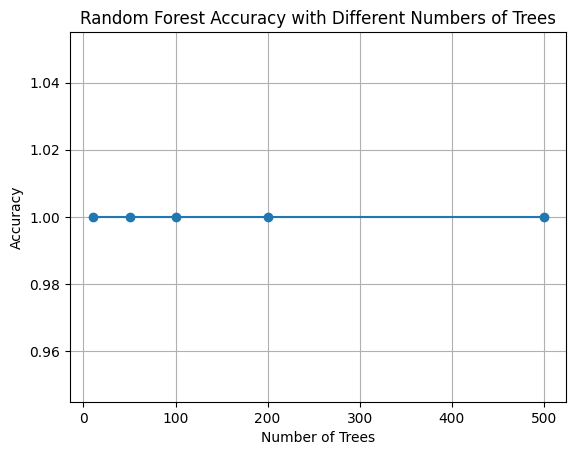

In [9]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load a sample dataset (Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List to store results
n_trees = [10, 50, 100, 200, 500]
accuracies = []

# Train and evaluate Random Forest Classifiers with different numbers of trees
for n in n_trees:
    rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_model.fit(X_train, y_train)  # Train the model
    y_pred = rf_model.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    accuracies.append(accuracy)

# Print the accuracy for each number of trees
for n, accuracy in zip(n_trees, accuracies):
    print(f"Number of Trees: {n}, Accuracy: {accuracy}")

# Plot the accuracy as a function of the number of trees
plt.plot(n_trees, accuracies, marker='o')
plt.title('Random Forest Accuracy with Different Numbers of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


Q8

In [44]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_auc_score

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Initialize Bagging Classifier with LogisticRegression as base estimator
bagging = BaggingClassifier(
    estimator=LogisticRegression(random_state=42, max_iter=1000),
    n_estimators=50,  # Number of base estimators
    max_samples=0.8,  # Fraction of samples to draw
    bootstrap=True,
    random_state=42
)

# Define AUC scoring metric
scoring = {
    'auc': make_scorer(roc_auc_score, needs_proba=True)
}

# Perform 5-fold cross-validation
cv_results = cross_validate(bagging, X, y, cv=5, scoring=scoring, return_train_score=False)

# Extract and print mean and standard deviation of AUC scores
auc_mean = np.mean(cv_results['test_auc'])
auc_std = np.std(cv_results['test_auc'])

print("Bagging Classifier (Logistic Regression) Performance:")
print(f"AUC Score: Mean = {auc_mean:.4f}, Std = {auc_std:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_param_validation.py", line 194, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/inspect.py", line 3195, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/inspect.

Bagging Classifier (Logistic Regression) Performance:
AUC Score: Mean = nan, Std = nan


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_param_validation.py", line 194, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/inspect.py", line 3195, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/inspect.

Q9

Feature Importance Scores:
      Feature  Importance
0      MedInc    0.526011
5    AveOccup    0.138220
7   Longitude    0.086124
6    Latitude    0.086086
1    HouseAge    0.054654
2    AveRooms    0.047188
4  Population    0.031722
3   AveBedrms    0.029995


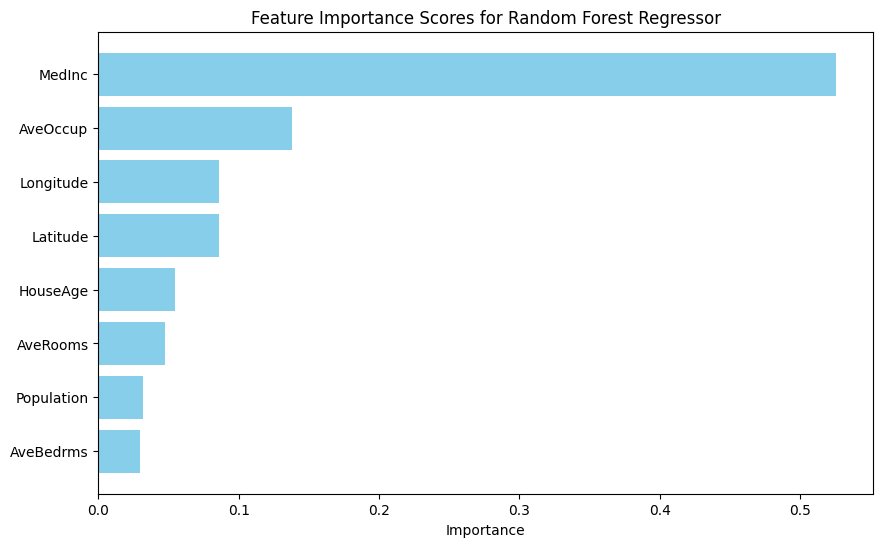

In [12]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Load the California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest Regressor
rf_model.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_df = pd.DataFrame({
    'Feature': data.feature_names,
    'Importance': feature_importances
})

# Sort features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Print the feature importance scores
print("Feature Importance Scores:")
print(feature_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance Scores for Random Forest Regressor')
plt.gca().invert_yaxis()  # To show the most important feature on top
plt.show()


Q10

In [43]:
import numpy as np
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Initialize models
models = {
    'Bagging Classifier': BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=42),
        n_estimators=50,  # Number of base estimators
        max_samples=0.8,  # Fraction of samples to draw
        bootstrap=True,
        random_state=42
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=50,  # Match number of estimators for fair comparison
        max_features='sqrt',  # Random feature selection
        bootstrap=True,
        random_state=42
    )
}

# Define scoring metric
scoring = {
    'accuracy': make_scorer(accuracy_score)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Perform 5-fold cross-validation
    cv_results = cross_validate(model, X, y, cv=5, scoring=scoring, return_train_score=False)

    # Store mean and std of accuracy
    results[name] = {
        'accuracy_mean': np.mean(cv_results['test_accuracy']),
        'accuracy_std': np.std(cv_results['test_accuracy'])
    }

# Print results
print("Performance Comparison: Bagging Classifier vs. Random Forest")
for name, metrics in results.items():
    print(f"\nModel: {name}")
    print(f"Accuracy: Mean = {metrics['accuracy_mean']:.4f}, Std = {metrics['accuracy_std']:.4f}")

Performance Comparison: Bagging Classifier vs. Random Forest

Model: Bagging Classifier
Accuracy: Mean = 0.9070, Std = 0.0244

Model: Random Forest
Accuracy: Mean = 0.9000, Std = 0.0249


Q11

In [20]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100],   # Number of trees
    'max_depth': [10, 20, None],  # Maximum depth of the trees
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1)

# Train the Random Forest Classifier using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Test the model with the best hyperparameters
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Calculate and print the accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with Best Hyperparameters: {accuracy}")


Best Hyperparameters: {'max_depth': 10, 'n_estimators': 50}
Test Accuracy with Best Hyperparameters: 1.0


Q12

In [42]:
import numpy as np
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Define different numbers of base estimators
n_estimators_values = [10, 20, 50, 100, 200]

# Define scoring metrics
scoring = {
    'mse': make_scorer(mean_squared_error, greater_is_better=False),
    'r2': make_scorer(r2_score)
}

# Train and evaluate Bagging Regressor for each n_estimators value
results = {}
for n_estimators in n_estimators_values:
    # Initialize Bagging Regressor
    bagging = BaggingRegressor(
        estimator=DecisionTreeRegressor(random_state=42),
        n_estimators=n_estimators,
        max_samples=0.8,  # Fraction of samples to draw
        bootstrap=True,
        random_state=42
    )

    # Perform 5-fold cross-validation
    cv_results = cross_validate(bagging, X, y, cv=5, scoring=scoring, return_train_score=False)

    # Store mean and std of scores
    results[n_estimators] = {
        'mse_mean': -np.mean(cv_results['test_mse']),  # Negate because greater_is_better=False
        'mse_std': np.std(cv_results['test_mse']),
        'r2_mean': np.mean(cv_results['test_r2']),
        'r2_std': np.std(cv_results['test_r2'])
    }

# Print results
print("Bagging Regressor Performance Comparison (Varying n_estimators):")
for n_estimators, metrics in results.items():
    print(f"\nNumber of Estimators: {n_estimators}")
    print(f"MSE: Mean = {metrics['mse_mean']:.4f}, Std = {metrics['mse_std']:.4f}")
    print(f"R²: Mean = {metrics['r2_mean']:.4f}, Std = {metrics['r2_std']:.4f}")

Bagging Regressor Performance Comparison (Varying n_estimators):

Number of Estimators: 10
MSE: Mean = 3103.9050, Std = 359.2148
R²: Mean = 0.8214, Std = 0.0114

Number of Estimators: 20
MSE: Mean = 2930.0967, Std = 354.3834
R²: Mean = 0.8316, Std = 0.0098

Number of Estimators: 50
MSE: Mean = 2778.4718, Std = 378.0140
R²: Mean = 0.8404, Std = 0.0116

Number of Estimators: 100
MSE: Mean = 2684.2808, Std = 384.0675
R²: Mean = 0.8458, Std = 0.0124

Number of Estimators: 200
MSE: Mean = 2666.8133, Std = 392.1574
R²: Mean = 0.8469, Std = 0.0124


Q13

In [23]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Identify the misclassified samples
misclassified_idx = (y_pred != y_test)

# Display the misclassified samples
misclassified_samples = pd.DataFrame(X_test[misclassified_idx], columns=data.feature_names)
misclassified_samples['True Class'] = y_test[misclassified_idx]
misclassified_samples['Predicted Class'] = y_pred[misclassified_idx]

# Print the misclassified samples
print("\nMisclassified Samples:")
print(misclassified_samples)



Accuracy: 100.00%

Misclassified Samples:
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), True Class, Predicted Class]
Index: []


Q14

In [41]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Initialize models
models = {
    'Bagging Classifier': BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=42),
        n_estimators=50,  # Number of base estimators
        max_samples=0.8,  # Fraction of samples to draw
        bootstrap=True,
        random_state=42
    ),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Define scoring metrics
scoring = {
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Perform 5-fold cross-validation
    cv_results = cross_validate(model, X, y, cv=5, scoring=scoring, return_train_score=False)

    # Store mean and std of scores
    results[name] = {
        'precision_mean': np.mean(cv_results['test_precision']),
        'precision_std': np.std(cv_results['test_precision']),
        'recall_mean': np.mean(cv_results['test_recall']),
        'recall_std': np.std(cv_results['test_recall']),
        'f1_mean': np.mean(cv_results['test_f1']),
        'f1_std': np.std(cv_results['test_f1'])
    }

# Print results
print("Performance Comparison: Bagging Classifier vs. Decision Tree")
for name, metrics in results.items():
    print(f"\nModel: {name}")
    print(f"Precision: Mean = {metrics['precision_mean']:.4f}, Std = {metrics['precision_std']:.4f}")
    print(f"Recall: Mean = {metrics['recall_mean']:.4f}, Std = {metrics['recall_std']:.4f}")
    print(f"F1-Score: Mean = {metrics['f1_mean']:.4f}, Std = {metrics['f1_std']:.4f}")

Performance Comparison: Bagging Classifier vs. Decision Tree

Model: Bagging Classifier
Precision: Mean = 0.9090, Std = 0.0237
Recall: Mean = 0.9070, Std = 0.0244
F1-Score: Mean = 0.9069, Std = 0.0245

Model: Decision Tree
Precision: Mean = 0.8622, Std = 0.0230
Recall: Mean = 0.8620, Std = 0.0232
F1-Score: Mean = 0.8620, Std = 0.0232


Q15

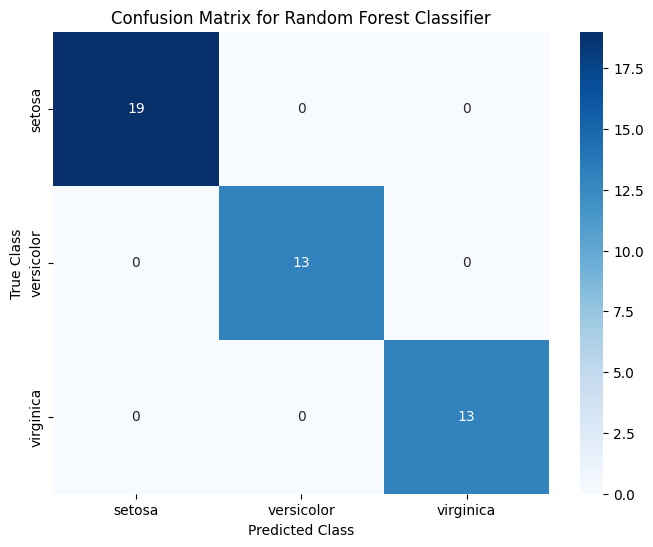

In [26]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


Q16

In [27]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the base models
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(random_state=42)
lr = LogisticRegression(max_iter=200, random_state=42)

# Create the stacking classifier
stacking_model = StackingClassifier(estimators=[('dt', dt), ('svm', svm), ('lr', lr)], final_estimator=LogisticRegression())

# Create the voting classifier (for comparison)
voting_model = VotingClassifier(estimators=[('dt', dt), ('svm', svm), ('lr', lr)], voting='hard')

# Train the stacking classifier
stacking_model.fit(X_train, y_train)

# Train the voting classifier
voting_model.fit(X_train, y_train)

# Predict with both models
y_pred_stacking = stacking_model.predict(X_test)
y_pred_voting = voting_model.predict(X_test)

# Calculate accuracy for both models
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
accuracy_voting = accuracy_score(y_test, y_pred_voting)

# Print the accuracy results
print(f"Accuracy of Stacking Classifier: {accuracy_stacking * 100:.2f}%")
print(f"Accuracy of Voting Classifier: {accuracy_voting * 100:.2f}%")

# Compare accuracies
if accuracy_stacking > accuracy_voting:
    print("\nStacking Classifier performs better than the Voting Classifier.")
else:
    print("\nVoting Classifier performs better than the Stacking Classifier.")


Accuracy of Stacking Classifier: 100.00%
Accuracy of Voting Classifier: 100.00%

Voting Classifier performs better than the Stacking Classifier.


Q17

In [28]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get the feature importance scores
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display the feature names and their importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top 5 most important features
print("Top 5 Most Important Features:")
print(importance_df.head(5))


Top 5 Most Important Features:
             Feature  Importance
3   petal width (cm)    0.433982
2  petal length (cm)    0.417308
0  sepal length (cm)    0.104105
1   sepal width (cm)    0.044605


Q18

In [40]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Initialize Bagging Classifier with DecisionTreeClassifier as base estimator
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,  # Number of base estimators
    max_samples=0.8,  # Fraction of samples to draw
    bootstrap=True,
    random_state=42
)

# Define scoring metrics
scoring = {
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Perform 5-fold cross-validation
cv_results = cross_validate(bagging, X, y, cv=5, scoring=scoring, return_train_score=False)

# Extract and print mean and standard deviation of scores
precision_mean = np.mean(cv_results['test_precision'])
precision_std = np.std(cv_results['test_precision'])
recall_mean = np.mean(cv_results['test_recall'])
recall_std = np.std(cv_results['test_recall'])
f1_mean = np.mean(cv_results['test_f1'])
f1_std = np.std(cv_results['test_f1'])

print("5-Fold Cross-Validation Results for Bagging Classifier:")
print(f"Precision: Mean = {precision_mean:.4f}, Std = {precision_std:.4f}")
print(f"Recall: Mean = {recall_mean:.4f}, Std = {recall_std:.4f}")
print(f"F1-Score: Mean = {f1_mean:.4f}, Std = {f1_std:.4f}")

5-Fold Cross-Validation Results for Bagging Classifier:
Precision: Mean = 0.9090, Std = 0.0237
Recall: Mean = 0.9070, Std = 0.0244
F1-Score: Mean = 0.9069, Std = 0.0245


Q19

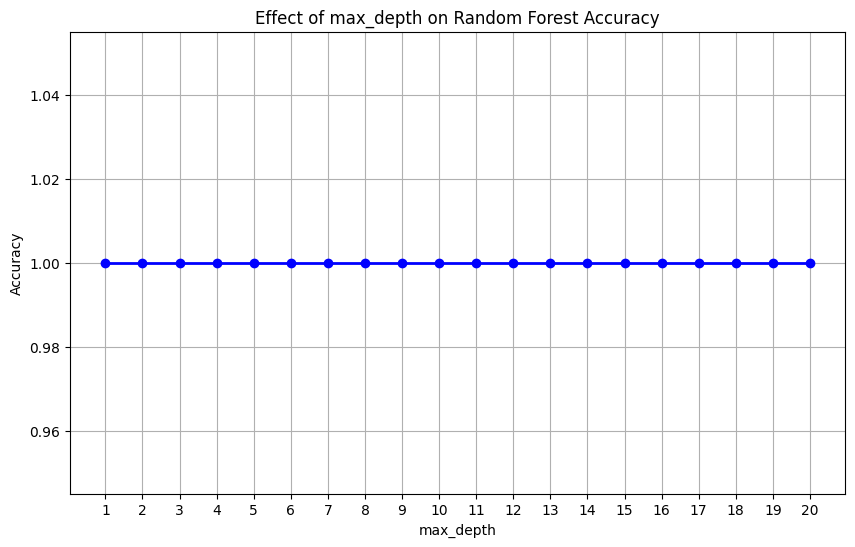

In [30]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of different max_depth values to try
max_depth_values = range(1, 21)  # Trying depths from 1 to 20

# List to store accuracy scores for each max_depth value
accuracy_scores = []

# Train Random Forest models with different max_depth values
for depth in max_depth_values:
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the accuracy as a function of max_depth
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, accuracy_scores, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.title('Effect of max_depth on Random Forest Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(range(1, 21))
plt.show()


Q20

In [39]:
import numpy as np
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Define base estimators
base_estimators = {
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'KNeighbors': KNeighborsRegressor(n_neighbors=5)
}

# Define scoring metrics
scoring = {
    'mse': make_scorer(mean_squared_error, greater_is_better=False),
    'r2': make_scorer(r2_score)
}

# Train and evaluate Bagging Regressor for each base estimator
results = {}
for name, estimator in base_estimators.items():
    # Initialize Bagging Regressor
    bagging = BaggingRegressor(
        estimator=estimator,
        n_estimators=50,  # Number of base estimators
        max_samples=0.8,  # Fraction of samples to draw
        bootstrap=True,
        random_state=42
    )

    # Perform 5-fold cross-validation
    cv_results = cross_validate(bagging, X, y, cv=5, scoring=scoring, return_train_score=False)

    # Store mean and std of scores
    results[name] = {
        'mse_mean': -np.mean(cv_results['test_mse']),  # Negate because greater_is_better=False
        'mse_std': np.std(cv_results['test_mse']),
        'r2_mean': np.mean(cv_results['test_r2']),
        'r2_std': np.std(cv_results['test_r2'])
    }

# Print results
print("Bagging Regressor Performance Comparison:")
for name, metrics in results.items():
    print(f"\nBase Estimator: {name}")
    print(f"MSE: Mean = {metrics['mse_mean']:.4f}, Std = {metrics['mse_std']:.4f}")
    print(f"R²: Mean = {metrics['r2_mean']:.4f}, Std = {metrics['r2_std']:.4f}")

Bagging Regressor Performance Comparison:

Base Estimator: DecisionTree
MSE: Mean = 2778.4718, Std = 378.0140
R²: Mean = 0.8404, Std = 0.0116

Base Estimator: KNeighbors
MSE: Mean = 3708.2135, Std = 483.7322
R²: Mean = 0.7874, Std = 0.0066


Q21

In [32]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Get predicted probabilities for each class
y_pred_prob = rf_model.predict_proba(X_test)

# Binarize the output labels for multi-class ROC-AUC (One-vs-Rest approach)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test_bin, y_pred_prob, average='macro', multi_class='ovr')

# Print the ROC-AUC score
print(f"ROC-AUC Score: {roc_auc:.4f}")


ROC-AUC Score: 1.0000


Q22

In [38]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, f1_score

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Initialize Bagging Classifier with DecisionTreeClassifier as base estimator
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,  # Number of base estimators
    max_samples=0.8,  # Fraction of samples to draw
    bootstrap=True,
    random_state=42
)

# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score, average='weighted')
}

# Perform 5-fold cross-validation
cv_results = cross_validate(bagging, X, y, cv=5, scoring=scoring, return_train_score=False)

# Extract and print mean and standard deviation of scores
accuracy_mean = np.mean(cv_results['test_accuracy'])
accuracy_std = np.std(cv_results['test_accuracy'])
f1_mean = np.mean(cv_results['test_f1'])
f1_std = np.std(cv_results['test_f1'])

print(f"5-Fold Cross-Validation Results:")
print(f"Accuracy: Mean = {accuracy_mean:.4f}, Std = {accuracy_std:.4f}")
print(f"F1-Score: Mean = {f1_mean:.4f}, Std = {f1_std:.4f}")

5-Fold Cross-Validation Results:
Accuracy: Mean = 0.9070, Std = 0.0244
F1-Score: Mean = 0.9069, Std = 0.0245


Q23

Average Precision Score: 1.0000


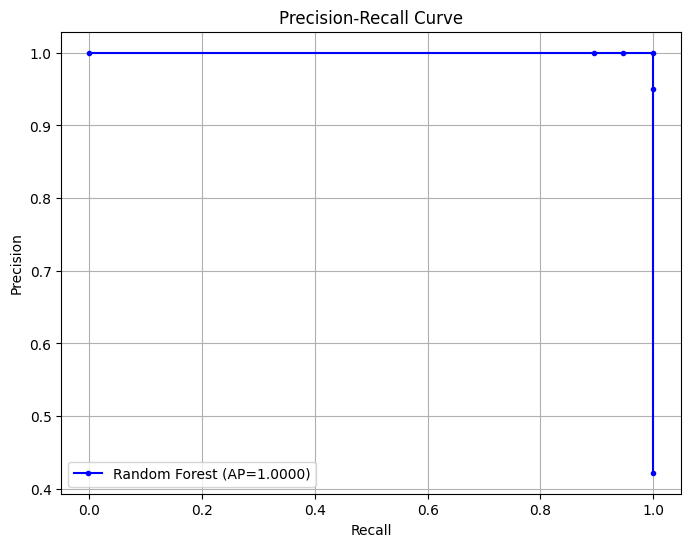

In [34]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Convert the problem into a binary classification for Precision-Recall curve (class 0 vs rest)
y_binary = (y == 0).astype(int)  # 1 if class 0, else 0

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Calculate Precision and Recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Calculate Average Precision Score
avg_precision = average_precision_score(y_test, y_pred_prob)
print(f"Average Precision Score: {avg_precision:.4f}")

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='b', label=f'Random Forest (AP={avg_precision:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()


Q24

In [35]:
# Import necessary libraries
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the base models
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=200, random_state=42))
]

# Initialize the Stacking Classifier with Logistic Regression as the final estimator
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

# Train the Stacking Classifier
stacking_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_stacking = stacking_model.predict(X_test)

# Calculate the accuracy of the Stacking Classifier
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)

# Train and evaluate Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Train and evaluate Logistic Regression
lr_model = LogisticRegression(max_iter=200, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Print the accuracy of each model
print(f"Accuracy of Stacking Classifier: {accuracy_stacking:.4f}")
print(f"Accuracy of Random Forest Classifier: {accuracy_rf:.4f}")
print(f"Accuracy of Logistic Regression: {accuracy_lr:.4f}")


Accuracy of Stacking Classifier: 1.0000
Accuracy of Random Forest Classifier: 1.0000
Accuracy of Logistic Regression: 1.0000


Q25

max_samples=0.1, MSE=3983.0510
max_samples=0.3, MSE=3020.3054
max_samples=0.5, MSE=2639.3488
max_samples=0.7, MSE=2671.7146
max_samples=1.0, MSE=2664.0809


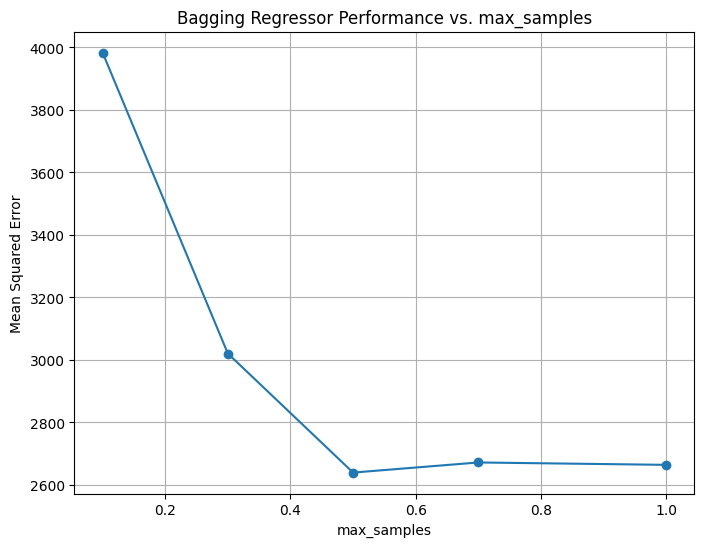

In [37]:
import numpy as np
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different levels of max_samples
max_samples_values = [0.1, 0.3, 0.5, 0.7, 1.0]
mse_scores = []

# Train and evaluate Bagging Regressor for each max_samples value
for max_samples in max_samples_values:
    # Initialize Bagging Regressor with DecisionTreeRegressor as base estimator
    bagging = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=50,  # Number of base estimators
        max_samples=max_samples,
        bootstrap=True,
        random_state=42
    )

    # Train the model
    bagging.fit(X_train, y_train)

    # Predict on test set
    y_pred = bagging.predict(X_test)

    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"max_samples={max_samples:.1f}, MSE={mse:.4f}")

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(max_samples_values, mse_scores, marker='o', linestyle='-', color='#1f77b4')
plt.xlabel('max_samples')
plt.ylabel('Mean Squared Error')
plt.title('Bagging Regressor Performance vs. max_samples')
plt.grid(True)
plt.show()